In [10]:
import numpy as np
import scipy.stats
from sympy.stats import Normal, P
from sympy import *
import pandas as pd
import math 

x, y, z, k = symbols('x y z k')


# Manejo de un fichero con enunciados y soluciones, se usa un dataframe
#df = pd.DataFrame()
#encabezado_df = [r"enunciado_latex",r"solucion"]
# Los datos tienen que ser una lista con esta estructura:
#datos = [[r"Texto_en_latex1",r"Texto_en_latex2"],[r"Solucion_en_latex_1",r"Solucion_en_latex_2"]]
# df = df.append(pd.DataFrame(dict(zip(encabezado_df, datos))))
# list(df.enunciado_latex)
# list(df.solucion)
lista_ejercicios = []

def mean_confidence_interval2(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def media_desviacion_muestra(data=[]):
    #devuelve de una muestra su media y su desviación típica
    m = round(np.mean((1.0*np.array(data))),4)
    d = round(np.std((1.0*np.array(data))),4)
    return m, d

def tikz_confianza(confianza,critico) :
    # devuelve la gráfica de la normal con el punto crítico y sus probabilidades
    conf = confianza
    crit = critico
    a = round((1-conf)/2,3)
    tikz = r"""
    \begin{tikzpicture}[scale=0.8]
    \pgfmathdeclarefunction{gauss}{2}{\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}
    \tikzmath{\conf = """+latex(conf)+r"""; \crit= """+latex(crit)+r"""; \a="""+latex(a)+r""");}
    \begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\crit}, ytick=\empty, xticklabels = {$0$, $z_{\frac{\alpha}{2}}=\crit$},enlargelimits=false, clip=false, axis on top]
      \addplot [fill=cyan!20, draw=none, domain=-\crit:\crit] {gauss(0,1)} \closedcycle;
      \addplot [very thick,cyan!50!black] {gauss(0,1)};
    \end{axis}
    \node[] at (5.2,1.5) {$\conf$};	
    \draw[-]   (\crit+6.5,1)node[right]{$\a$}  --  (\crit+5.6,0.1) ;
    \end{tikzpicture} \\
    """
    return tikz

def tikz_intervalo(centro, radio) :
    # Devuelve el código de la representación de un intervalo
    tikz = r""" \\ 
    \begin{tikzpicture}[scale=0.4]
      \tikzmath{\a = -10; \b = 10; \aa = \a -1; \bb = \b + 1 ; \dist = \b - \a; \med = (\a + \b)/2;}
      \draw[very thick] (\a,0) -- (\b,0);
      \path [draw=black, fill=white] (\b,0) circle (2pt);
      \path [draw=black, fill=white] (\a,0.0) circle (2pt);
      \draw[latex-latex] (\a - 1.5,0) -- (\b + 1.5,0) ;
      \draw[shift={(\a,0)},color=black] (0pt,3pt) -- (0pt,-3pt);
      \draw[shift={(\a,0)},color=black] (0pt,0pt) -- (0pt,-3pt) node[below] {$"""+latex(centro -radio)+r"""$};
      \draw[shift={(\med,0)},color=black] (0pt,3pt) -- (0pt,-3pt);
      \draw[shift={(\med,0)},color=black] (0pt,0pt) -- (0pt,-3pt) node[below] {$"""+latex(centro)+r"""$};
      \draw[shift={(\b,0)},color=black] (0pt,3pt) -- (0pt,-3pt);
      \draw[shift={(\b,0)},color=black] (0pt,0pt) -- (0pt,-3pt) node[below] {$"""+latex(centro + radio)+r"""$};
      \draw[decorate,decoration={brace}, thick](\med,0.2)--(\b,0.2) node[above, midway] {$E="""+latex(radio)+r"""$}; 
    \end{tikzpicture} \\
    """
    return tikz

def media_intervalo(confianza, mu , sigma, N) : 
    #Intervalo de confianza de la media, la confianza en probabilidad no porcentaje
    enunciado_latex = r"""Intervalo de confianza para la media, si la media muestral es: {}, la desviación típica: {}, tamaño de la muestra: {} y el grado de confianza: {}\%. \\ \\ """.format(mu,sigma,N,confianza*100)
    alpha = 1-confianza 
    solucion_latex = r"""Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: {}, la desviación típica: {}, tamaño de la muestra: {} y el grado de confianza: {}\%. \\ \\ """.format(mu,sigma,N,confianza*100)
    solucion_latex += r"Valor crítico: \\ $\alpha=1-"+latex(confianza)+r"="+latex(round(1-confianza,2))+r"\to \frac{\alpha}{2}="+latex(round(alpha/2,4))+r"$ \\ \\ "
    #pmax = (1-(1-confianza)/2)
    pmax = confianza+(alpha)/2
    zcritico=round(scipy.stats.norm.ppf(pmax),4)
    solucion_latex += r"$P(Z>z_{\alpha/2})="+latex(round(alpha/2,4))+r"\to P(Z<z_{\alpha/2})="+latex(pmax)+r" \to z_{\alpha/2} ="+latex(zcritico)+r"$ \\ "
    solucion_latex += tikz_confianza(confianza,zcritico)
    E=round(zcritico*sigma/np.sqrt(N),4)
    solucion_latex += r"Error cometido: \\ $E=z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}} \to E="+latex(zcritico)+r"\cdot \frac{"+latex(sigma)+r"}{"+latex(np.sqrt(N))+r"}="+latex(E)+r"$ \\ "
    solucion_latex += r"Por tanto el intervalo de confianza será: \\"
    solucion_latex += r"$\left(\overline{x} - E , \overline{x} + E \right)=\left("+latex(mu)+r" - "+latex(E)+r" , "+latex(mu)+r" + "+latex(E)+r" \right)=\left("+latex(round(mu-E,4))+r", "+latex(round(mu+E,4))+r" \right)$ \\ "
    solucion_latex += tikz_intervalo(mu,E)
    return alpha,pmax,zcritico,E,mu-E,mu+E,scipy.stats.norm.interval(confianza, loc=mu, scale=sigma/np.sqrt(N)),enunciado_latex,solucion_latex

def proporcion_intervalo(confianza, aciertos, N) : 
    #Intervalo de confianza de la proporción, la confianza en probabilidad no porcentaje
    enunciado_latex = r"""Intervalo de confianza para la proporción, si los aciertos son: {}, tamaño de la muestra: {} y el grado de confianza: {}\%. \\ \\ """.format(aciertos,N,confianza*100)
    proporcion_muestral = aciertos/N
    alpha = 1-confianza
    solucion_latex = r"""Calculamos el intervalo de confianza para la proporción, si los aciertos son: {}, tamaño de la muestra: {} y el grado de confianza: {}\%. \\ \\ """.format(aciertos,N,confianza*100)
    solucion_latex += r"Valor crítico: \\ $\alpha=1-"+latex(confianza)+r"="+latex(round(1-confianza,2))+r"\to \frac{\alpha}{2}="+latex(round(alpha/2,4))+r"$ \\ \\ "
    #pmax = (1-(1-confianza)/2)
    pmax = confianza+(alpha)/2
    zcritico=round(scipy.stats.norm.ppf(pmax),4)
    solucion_latex += r"$P(Z>z_{\alpha/2})="+latex(round(alpha/2,4))+r"\to P(Z<z_{\alpha/2})="+latex(pmax)+r" \to z_{\alpha/2} ="+latex(zcritico)+r"$ \\ "
    solucion_latex += tikz_confianza(confianza,zcritico)

    E=round(zcritico*np.sqrt(proporcion_muestral*(1-proporcion_muestral)/N),4)
    solucion_latex += r"Error cometido: \\ $E=z_{\alpha / 2}\cdot \sqrt{\frac{\widehat{p}\cdot\left(1-\widehat{p} \right)}{n}} \to E="+latex(zcritico)+r"\cdot \sqrt{\frac{"+latex(proporcion_muestral)+r"\cdot"+latex(round(1-proporcion_muestral,4))+r"}{"+latex(N)+r"}}="+latex(E)+r"$ \\ "
    solucion_latex += r"Por tanto el intervalo de confianza será: \\"
    solucion_latex += r"$\left(\widehat{p} - E , \widehat{p} + E \right)=\left("+latex(proporcion_muestral)+r" - "+latex(E)+r" , "+latex(proporcion_muestral)+r" + "+latex(E)+r" \right)=\left("+latex(round(proporcion_muestral-E,4))+r", "+latex(round(proporcion_muestral+E,4))+r" \right)$ \\ "
    solucion_latex += tikz_intervalo(proporcion_muestral,E)

    return proporcion_muestral, alpha,pmax,zcritico,E,proporcion_muestral-E,proporcion_muestral+E,scipy.stats.norm.interval(confianza, loc=aciertos/N, scale=np.sqrt(((aciertos/N)*(1-aciertos/N))/N)),enunciado_latex,solucion_latex


def error_max_media(confianza, sigma, E) :
    enunciado_latex = r"""Tamaño de la muestra para estimar la media con un error máximo: {}, si la desviación típica es: {} y el grado de confianza: {}\%. \\ \\ """.format(E,sigma,confianza*100)
    alpha = 1-confianza
    #pmax = (1-(1-confianza)/2)
    pmax = confianza+(alpha)/2
    zcritico=round(scipy.stats.norm.ppf(pmax),4)
    solucion_latex = r"""Calculamos el tamaño de la muestra para estimar la media con un error máximo: {}, si la desviación típica es: {} y el grado de confianza: {}\%. \\ \\ """.format(E,sigma,confianza*100)
    solucion_latex += r"Valor crítico: \\ $\alpha=1-"+latex(confianza)+r"="+latex(round(1-confianza,2))+r"\to \frac{\alpha}{2}="+latex(round(alpha/2,4))+r"$ \\ \\ "
    solucion_latex += r"$P(Z>z_{\alpha/2})="+latex(round(alpha/2,4))+r"\to P(Z<z_{\alpha/2})="+latex(pmax)+r" \to z_{\alpha/2} ="+latex(zcritico)+r"$ \\ "
    solucion_latex += tikz_confianza(confianza,zcritico)
    n=(zcritico*sigma/E)**2
    solucion_latex += r"Error cometido: \\ $E=z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}} \to n \approx \frac{\sigma^2 \cdot z_{\alpha / 2}^2}{E^2}="+latex(n)+r" \to n \geq"+latex(math.ceil(n))+r"$ \\ "

    
    return alpha, pmax, round(zcritico,4), round(n,4), math.ceil(n), enunciado_latex, solucion_latex


def error_max_proporcion(confianza, proporcion, E) :
    enunciado_latex = r"""Tamaño de la muestra para estimar la proporcion con un error máximo: {}, si la proporción muestral es: {} y el grado de confianza: {}\%. \\ \\ """.format(E,proporcion,confianza*100)
    alpha = 1-confianza
    #pmax = (1-(1-confianza)/2)
    pmax = confianza+(alpha)/2
    zcritico=round(scipy.stats.norm.ppf(pmax),4)
    solucion_latex = r"""Calculamos el tamaño de la muestra para estimar la proporcion con un error máximo: {}, si la proporción muestral es: {} y el grado de confianza: {}\%. \\ \\ """.format(E,proporcion,confianza*100)
    solucion_latex += r"Valor crítico: \\ $\alpha=1-"+latex(confianza)+r"="+latex(round(1-confianza,2))+r"\to \frac{\alpha}{2}="+latex(round(alpha/2,4))+r"$ \\ \\ "
    solucion_latex += r"$P(Z>z_{\alpha/2})="+latex(round(alpha/2,4))+r"\to P(Z<z_{\alpha/2})="+latex(pmax)+r" \to z_{\alpha/2} ="+latex(zcritico)+r"$ \\ "
    solucion_latex += tikz_confianza(confianza,zcritico)
    n=(proporcion*(1-proporcion))/(E/zcritico)**2
    solucion_latex += r"Error cometido: \\ $E=z_{\alpha / 2}\cdot \sqrt{\frac{\widehat{p}\cdot\left(1-\widehat{p} \right)}{n}} \to n =\frac{\widehat{p}\cdot\left(1-\widehat{p} \right)\cdot z_{\alpha / 2}^2}{E^2} \to n \geq"+latex(math.ceil(n))+r"$ \\ "

    
    return alpha, pmax, round(zcritico,4), round(n,4), math.ceil(n), enunciado_latex, solucion_latex

def confianza_media(sigma, N, E) :
    # Devuelve el grado de confianza correspondiente a un tamaño de muestra y un intervalo para la media
    valor_critico = round(solve(z*sigma/sqrt(N)-E,z)[0],2)
    Z = Normal('Z',0,1)
    alpha = 2*(P(Z>valor_critico).evalf(4))
    confianza = 1-alpha
    solucion = r"Calculamos el grado de confianza para un error máximo: {}, siendo el tamaño muestral: {} y la desviación típica: {}. \\ \\ ".format(E,N,sigma)
    solucion += r" \\ Como $E=z_{\alpha / 2}\cdot \frac{\sigma}{\sqrt{n}} \Rightarrow z_{\alpha / 2} ="
    solucion += r"\frac{E \cdot \sqrt{n}}{\sigma}\to z_{\alpha / 2}="+latex(valor_critico)+r"$ \\ "
    solucion += r"$P(Z>z_{\alpha / 2})=P(Z>"+latex(valor_critico)+r")=\frac{\alpha}{2}="+latex(P(Z>valor_critico).evalf(4))+r"$ \\ "
    solucion += r"$\alpha="+latex(alpha)+r" \to \quad confianza=1 - \alpha="+latex(confianza)+r" \to "+latex(confianza*100)+r" \%$ "
    return confianza, solucion

In [11]:
Z = Normal('Z',0,1)
X = Normal ('X',5,2)


P(-2.17>Z).evalf(4)
P(And(-2.03<Z, Z<1.52)).evalf(4), (P(Z<1.52)-1+P(Z<2.03)).evalf(4)

round(scipy.stats.norm.ppf(0.8365),2)
mu = 5
des = 2
#P(X>80).evalf(4)
P(And(3<X, X<6)).evalf(4)
#P(X<7.2).evalf(4)
p = 1 - 0.4801
round(scipy.stats.norm.ppf(p),2)
val=round(scipy.stats.norm.ppf(p),2)
val, solve((k-5)/2-val)[0]


(0.05, 5.10000000000000)

In [63]:
round(scipy.stats.norm.ppf(1-round((round(1-0.5934,4))/2,4)),2)*2

round(scipy.stats.norm.ppf(1 - round(1-0.5934,4)/2),2)*2

1.66

In [17]:
#ejemplo 

mu = 6.32
sigma = 2.3
confianza = 0.95
N = 100

print(media_intervalo(confianza, mu , sigma, N)[7])
print(media_intervalo(confianza, mu , sigma, N)[8])



Intervalo de confianza para la media, si la media muestral es: 6.32, la desviación típica: 2.3, tamaño de la muestra: 100 y el grado de confianza: 95.0\%. \\ \\ 
Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: 6.32, la desviación típica: 2.3, tamaño de la muestra: 100 y el grado de confianza: 95.0\%. \\ \\ Valor crítico: \\ $\alpha=1-0.95=0.05\to \frac{\alpha}{2}=0.025$ \\ \\ $P(Z>z_{\alpha/2})=0.025\to P(Z<z_{\alpha/2})=0.975 \to z_{\alpha/2} =1.96$ \\ 
    \begin{tikzpicture}[scale=0.8]
    \pgfmathdeclarefunction{gauss}{2}{\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}
    \tikzmath{\conf = 0.95; \crit= 1.96; \a=0.025);}
    \begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\crit}, ytick=\empty, xticklabels = {$0$, $z_{\frac{\alpha}{2}}=\crit$},enlargelimits=false, clip=false, axis on top]
      \addplot [fill=cyan!20, draw=none, domain=-\crit:\crit] {gauss(0,1)} \closedcycle;
    

### Ejercicios del cuadernillo

In [3]:
enunciado = r"""p71e01-Una muestra aleatoria de 36 personas, empleadas en una gran industria, da el número medio de días al año
que faltan al trabajo es $\overline{x} = 12$ con $s = 4$.
a) Dar una estimación puntual de $\mu$.
b) Tomando un nivel del 99\% dar el intervalo de confianza de $\mu$.
c) Tomando un nivel del 95\% dar el intervalo de confianza de $\mu$."""
N=36
mu=12
s=4
#sigma=round(sqrt(N/(N-1)*s**2),4)
sigma = s

solucion = r"""a) $\mu\approx """+latex(mu)+r"""$ \\ b) """
solucion += media_intervalo(0.99,mu,sigma,N)[8] + r"\\ c) "
solucion += media_intervalo(0.95,mu,sigma,N)[8]

lista_ejercicios.append([enunciado,solucion])


In [4]:
enunciado = r"""p71e02- Cuál debe ser el tamaño de una muestra si se quiere estimar el gasto medio de una familia en electricidad,
mensualmente, con un error menor de 1.500 pesetas y el 95/% como nivel de confianza, sabiendo que el gasto
medio en 1999 era de 13.300 ptas. con una desviación de 1.200 ptas."""

E=1500
mu=13300
sigma=1200

solucion = error_max_media(0.95,sigma,E)[6]
#solucion = r"""Deberá ser: """+latex(mu)+r"""$ \\ b) """

lista_ejercicios.append([enunciado,solucion])


In [5]:
enunciado = r"""p71e03- Una muestra aleatoria de 100 bombillas producidas por una determinada fábrica, tiene una vida media de
1.280 horas con una desviación típica de 140 horas:
i) Estimar la duración media de las bombillas fabricas por esa fábrica.
ii) Dar el intervalo de confianza, a un nivel del 0,95 de la estimación anterior."""
N=100
mu=1280
sigma=140

solucion = r"""i) $\mu\approx """+latex(mu)+r"""$ \\ ii) """
solucion += media_intervalo(0.95,mu,sigma,N)[8] 

lista_ejercicios.append([enunciado,solucion])


In [6]:
enunciado = r"""p71e04- La dirección de un hotel quiere saber el número de días que, de promedio, sus clientes se hospedan en él .
Toma una muestra de 400 clientes y obtiene una media de 5,4 días con una desviación típica de 2 días.
i) Estimar el número medio de días que los clientes permanecen en el hotel.
ii) Hallar el intervalo de confianza de la estimación anterior a un nivel del 90\%"""
N=400
mu=5.4
sigma=2

solucion = r"""i) $\mu\approx """+latex(mu)+r"""$ \\ ii) """
solucion += media_intervalo(0.9,mu,sigma,N)[8] 

lista_ejercicios.append([enunciado,solucion])


In [7]:
enunciado = r"""p71e05- Una muestra aleatoria de 225 votantes tiene 135 partidarios para el pago de impuestos destinados a la mejora
de la ciudad.
i) Efectuar una estimación puntual del porcentaje de votantes que están a favor de pagar el nuevo
impuesto.
ii) Dar el intervalo de confianza, a un nivel del 0,95 de la estimación anterior."""
N=225
aciertos=135


solucion = r"""i) $p \approx \widehat{p} ="""+latex(round((aciertos/N)*100),4)+r"""$\% \\ ii) """
solucion += proporcion_intervalo(0.95,aciertos,N)[9] 


lista_ejercicios.append([enunciado,solucion])


In [8]:
enunciado = r"""p71e06- El valor de diez cheques al descubierto ha sido de 670, 1400, 350, 1700, 2000, 1700, 530, 710, 1200 y 1000
euros. Si estas diez denuncias se consideran como una muestra del total de todas las que por ese motivo se
realizan a lo largo de un año, ¿cuál será el valor medio de los cheques al descubierto que se expedirán."""

datos = [670, 1400, 350, 1700, 2000, 1700, 530, 710, 1200, 1000]
N=10

solucion = r"""Calculamos la media estadística para estimar la media: $\overline{x}=\frac{{\sum_{i=1}^n x_i }}{n} ="""+latex(media_desviacion_muestra(datos)[0])+r"""$ \\"""

lista_ejercicios.append([enunciado,solucion])

In [9]:
enunciado = r"""p71e07- De 120 alumnos, la proporción de que tengan dos o más hermanos es de 48/120. Indica los parámetros de la
distribución a las que se ajustarían las muestras de tamaño 30."""
str_p='48/120'
p = S(str_p)
n = 30
str_s= "sqrt(("+str_p+"*(1-"+str_p+"))/"+str(n)+")"


solucion = r"""La distribución muestral $\widehat{p} \rightarrow N \left ( p , \sqrt{ \frac{p \cdot (1-p)} {n}}\right )$. Luego: \\ """
solucion += r"""$p \approx \widehat{p}="""+latex(S(str_p, evaluate=False))+r"""="""+latex(S(str_p))+r"""$ \\ """
solucion += r"""$\sigma \approx \sqrt{\frac{"""+latex(S(str_p, evaluate=False))
solucion += r"""\cdot \left(1-"""+latex(S(str_p, evaluate=False))+r"""\right)}{"""+latex(n)+r"""}}="""+latex(S(str_s))+r"""$ \\ """

lista_ejercicios.append([enunciado,solucion])


In [10]:
enunciado = r"""p71e08- En cierto instituto de Enseñanza Secundaria hay matriculados 800 alumnos. A una muestra seleccionada
aleatoriamente de un 15\% de ellos, se les preguntó si utilizaban la cafetería del centro. Contestaron
negativamente un total de 24 alumnos. Estima el porcentaje de alumnado que utiliza la cafetería del instituto.
Determina, con un confianza del 99\%, el error máximo cometido con dicha estimación"""
N=15*800/100
aciertos=15*800/100-24


solucion = r"""i) Tamaño de la muestra:$"""+latex(N)+r"""$. Alumnos de la muestra que utiliza la cafetería: $"""+latex(aciertos)+r"""\to $ \\ """
solucion += r"""$p \approx \widehat{p} ="""+latex(round((aciertos/N)*100),4)+r"""$\% \\ ii) """
solucion += proporcion_intervalo(0.95,aciertos,N)[9]+ r"\\ Por tanto, el error máximo es: "  
solucion += latex(proporcion_intervalo(0.95,aciertos,N)[4]) 

lista_ejercicios.append([enunciado,solucion])


In [11]:
enunciado = r"""p71e09- Para estimar la proporción de las familias de una determinada ciudad que poseen microondas, 
se quiere
utilizar una muestra aleatoria de medida n. Calcula el valor mínimo de n para garantizar que, a un nivel de
confianza del 95\%, el error en la estimación sea menor que 0,005. (Como se desconoce la proporción, se ha de
tomar el caso más desfavorable que será 0,5)"""

E=0.005
proporcion=0.5


solucion = error_max_proporcion(0.95,proporcion,E)[6]
solucion

lista_ejercicios.append([enunciado,solucion])


In [12]:
enunciado = r"""p71e10- El peso medio de una muestra aleatoria de 81 personas de una determinada población es de 63,5 kg. Se
sabe que la desviación típica poblacional es de 6 kg. Con un nivel de significación del 0,05, ¿hay suficientes
evidencias para rechazar la afirmación de que el peso medio poblacional es de 60 kg.?"""
N=81
mu=63.5
sigma=6

solucion = r"""Calulamos el intervalo de confianza centrado en: """+latex(mu)+r"""$ \\"""
solucion += media_intervalo(0.95,mu,sigma,N)[8] 
solucion += r" \\ Como 60 queda fuera del intervalo, se rechaza la afirmación"

# lista_ejercicios.append([enunciado,solucion])


In [13]:
enunciado = r"""p71e11- Una encuesta realizada a 64 empleados de una fábrica, concluyó que el tiempo medio de duración de un
empleo en la mismca era de 6,5 años, con una desviación típica de 4. ¿Sirve esta información para aceptar, con
un nivel de significación del 5\%, que el tiempo medio de empleo en esa fábrica es menor o igual a 6 años?"""
N=64
mu=6.5
sigma=4

solucion = r"""i) $\mu\approx """+latex(mu)+r"""$ \\ ii) """
solucion += media_intervalo(0.95,mu,sigma,N)[8] 
solucion += r" \\ Como 6 queda fuera del intervalo, se rechaza la afirmación"

media_intervalo(0.95,mu,sigma,N)
# lista_ejercicios.append([enunciado,solucion])


(0.050000000000000044,
 0.975,
 1.96,
 0.98,
 5.52,
 7.48,
 (5.520018007729973, 7.479981992270027),
 'Intervalo de confianza para la media, si la media muestral es: 6.5, la desviación típica: 4, tamaño de la muestra: 64 y el grado de confianza: 95.0\\%. \\\\ \\\\ ',
 'Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: 6.5, la desviación típica: 4, tamaño de la muestra: 64 y el grado de confianza: 95.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.95=0.05\\to \\frac{\\alpha}{2}=0.025$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.025\\to P(Z<z_{\\alpha/2})=0.975 \\to z_{\\alpha/2} =1.96$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.95; \\crit= 1.96; \\a=0.025);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\\crit}, ytick=\\empty, xticklabels = {$0$, $z_{\\frac{\\alpha}{2}}=\\crit

In [14]:
enunciado = r"""p71e12- En un determinado barrio se seleccionó al azar una muestra de 100 personas cuya media de ingresos
mensuales resultaba igual a 106.000 ptas. con una desviación típica de 20.000 ptas.
a) Si se toma un nivel de confianza del 95\% , ¿Cuál es el intervalo de confianza para la media de los
ingresos mensuales de toda la población?
b) Si se toma un nivel de significación igual a 0,01, ¿cuál es el tamaño muestral necesario para estimar
la media de ingresos mensuales con un error menor de 3.000 pesetas?"""
N=100
mu=106000
sigma=20000

solucion = r"""a) \\  \\"""
solucion += media_intervalo(0.95,mu,sigma,N)[8] 

E=3000
solucion += r" \\ b) \\" + latex(error_max_media(0.99, sigma, E)[6])

lista_ejercicios.append([enunciado,solucion])


In [15]:
enunciado = r"""p71e13- Sea X la variable aleatoria Tiempo empleado por cada 1000 pesetas de mercancía distribuida en una
determinada ruta. Una muestra de tamaño 12 proporcionó una media muestral de 3 minutos y una desviación
típica de 0,5 minutos. Calcular un intervalo de confianza al 95\% para el tiempo medio de reparto cada 1000
pesetas, suponiendo que la variable aleatoria es aproximadamente normal.
a) Si el coste por hora de reparto es de 5000 pesetas calcular los límites entre los cuales estará
comprendido el coste de reparto de cada 1000 pesetas con probabilidad de 0,95.
b) Calcule el tamaño muestral necesario para que el coste de reparto por cada 1000 pesetas se conozca
con una precisión de 5 pesetas asociada a un nivel de confianza de 0,95 (probabilidad de que el error
no sobrepase las 5 ptas.)"""
N=12
mu=3
sigma=0.5

intervalo = media_intervalo(0.95,mu,sigma,N)
solucion = r"""a) \\"""
solucion += intervalo[8] 
solucion += r" \\  Por tanto, a 5000 pesetas por hora, el coste estará entre: "+latex(5000*intervalo[4])+r" y "+latex(5000*intervalo[5])+r"."

E=5
solucion += r" \\ b) \\" + latex(error_max_media(0.95, sigma, E)[6])


lista_ejercicios.append([enunciado,solucion])


In [16]:
enunciado = r"""p71e14- Suponga que la demanda semanal de un cierto artículo, en temporada alta es una variable aleatoria cuya
distribución puede considerarse aproximadamente normal.
Una muestra de 5 semanas proporcionó una media muestral de 875 unidades y una desviación típica
muestral de 23. Obtener con el 99\% de confianza un intervalo para la demanda media semanal de dicho
artículo."""
N=5
mu=875
sigma=23

solucion = media_intervalo(0.99,mu,sigma,N)[8] 

lista_ejercicios.append([enunciado,solucion])


In [17]:
enunciado = r"""p71e15- i) En un almacén se realizan pedidos de un artículo cualquiera, para que en el momento de la reposición, el
nivel de género sea siempre una cantidad fija. Una muestra de tamaño 15 dio un tiempo medio necesario para
alcanzar el nivel establecido de seguridad (y por tanto de reposición) de 25 días y una desviación típica
muestral de 3 días. Obtenga un intervalo de confianza para estimar el tiempo medio de reposición, con un
nivel de confianza del 96\%
ii) Calcula el tamaño muestral necesario para estimar el tiempo medio de reposición con una precisión de 1
día con un nivel de confianza de 0,95."""
N=15
mu=25
sigma=3

solucion = r"""i) Al enunciado le faltaría indicar que la distribución de pedidos sigue un normal ya que el tamaño de la muestra es menor de 30  \\"""
solucion += media_intervalo(0.96,mu,sigma,N)[8] 

E=3000
solucion += r" \\ ii) \\" + latex(error_max_media(0.95, sigma, E)[6])

lista_ejercicios.append([enunciado,solucion])


In [18]:
enunciado = r"""p71e16- En un municipio de 8940 personas, mayores de 18 años, nos interesa conocer el porcentaje de sujetos que
tienen carnet de conducir. Al nivel de confianza del 98\% y con un error no superior a 0,03 , ¿Qué tamaño
tiene que tener la muestra?."""

E=0.03
proporcion=0.5

solucion = r"Como no sabemos la proporción muestral, tomamos el valor 0.5 que es el que maximiza $p \cdot (1 -p)$ \\ "
solucion += error_max_proporcion(0.98,proporcion,E)[6]


lista_ejercicios.append([enunciado,solucion])


In [19]:
enunciado = r"""p71e17- Al objeto de optimizar los pedidos de tallas de una prenda de vestir para la próxima temporada, se
registraron los porcentajes del número de veces que fueron solicitadas las distintas tallas sobre una muestra de
500 clientes. Si el porcentaje del número de veces para la talla media fueron del 23\%, calcule un intervalo de
confianza para tal porcentaje con un nivel de significación del 3\%"""
N=500
aciertos=23*N/100

solucion = proporcion_intervalo(0.97,aciertos,N)[9]

lista_ejercicios.append([enunciado,solucion])


In [20]:
enunciado = r"""p71e18- La producción de un máquina se distribuye según la ley normal y fabrica piezas con un peso 
medio de 245
gr y una desviación típica de 36,3 gr. Para determinar si las piezas que produce en la actualidad están de
acuerdo a estas normas, se toma cada cuatro horas una muestra de 16 piezas y se determina su peso medio.
Calcula los límites de confianza al 95 y 99\%, construyendo el correspondiente gráfico de control."""
N=16
mu=245
sigma=36.3

solucion = r"""i) Al 95\%: \\  """+media_intervalo(0.95,mu,sigma,N)[8]+r""" \\ ii) Al 99\%: \\  """+media_intervalo(0.99,mu,sigma,N)[8]


p1=plot(media_intervalo(0.95,mu,sigma,N)[4],media_intervalo(0.95,mu,sigma,N)[5],media_intervalo(0.99,mu,sigma,N)[4],media_intervalo(0.99,mu,sigma,N)[5])
p1.save("p71e18.png")

solucion += r"Por tanto el gráfico de control quedará: \\ \includegraphics[scale=0.6]{p71e18.png}"

lista_ejercicios.append([enunciado,solucion])


<Figure size 640x480 with 1 Axes>

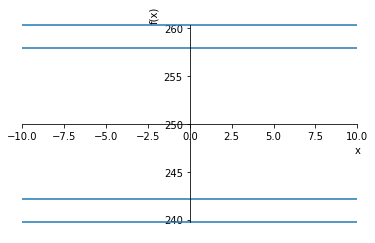

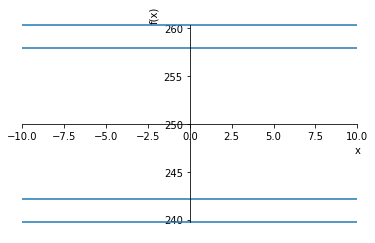

In [21]:
enunciado = r"""p71e19- Los pesos de los paquetes de café que envasan en una factoría siguen una distribución normal con un peso
medio de 250 gr y desviación típica de 16 gr. En el proceso de control de calidad del envasado se toma una
muestra de 16 envases cada cuatro horas y se calcula el peso medio de la muestra. Diseña un gráfico sobre el
que podamos representar semanalmente los análisis efectuados y controlar la calidad del proceso con los
niveles de confianza del 95 y 99\%."""
N=16
mu=250
sigma=16

solucion = r"""i) Al 95\%: \\  """+media_intervalo(0.95,mu,sigma,N)[8]+r""" \\ ii) Al 99\%: \\  """+media_intervalo(0.99,mu,sigma,N)[8]


p1=plot(media_intervalo(0.95,mu,sigma,N)[4],media_intervalo(0.95,mu,sigma,N)[5],media_intervalo(0.99,mu,sigma,N)[4],media_intervalo(0.99,mu,sigma,N)[5])
p1.save("p71e19.png")

solucion += r"Por tanto el gráfico de control quedará: \\ \includegraphics[scale=0.6]{p71e19.png}"

lista_ejercicios.append([enunciado,solucion])


In [22]:
df=pd.DataFrame(lista_ejercicios,columns=['enunciado','solucion'])
df.to_csv("ejercicios_intervalos.csv")
df

,enunciado,solucion
0,"p71e01-Una muestra aleatoria de 36 personas, e...",a) $\mu\approx 12$ \\ b) Calculamos el interva...
1,p71e02- Cuál debe ser el tamaño de una muestra...,Calculamos el tamaño de la muestra para estima...
2,p71e03- Una muestra aleatoria de 100 bombillas...,i) $\mu\approx 1280$ \\ ii) Calculamos el inte...
3,p71e04- La dirección de un hotel quiere saber ...,i) $\mu\approx 5.4$ \\ ii) Calculamos el inter...
4,p71e05- Una muestra aleatoria de 225 votantes ...,i) $p \approx \widehat{p} =60$\% \\ ii) Calcul...
5,p71e06- El valor de diez cheques al descubiert...,Calculamos la media estadística para estimar l...
6,"p71e07- De 120 alumnos, la proporción de que t...",La distribución muestral $\widehat{p} \rightar...
7,p71e08- En cierto instituto de Enseñanza Secun...,i) Tamaño de la muestra:$120.0$. Alumnos de la...
8,p71e09- Para estimar la proporción de las fami...,Calculamos el tamaño de la muestra para estima...
9,p71e12- En un determinado barrio se seleccionó...,a) \\ \\Calculamos el intervalo de confianza ...


In [23]:
lista_ejercicios2=[]

In [24]:
enunciado = r"""Para estimar el peso medio de las chicas de
16 años de una ciudad, se toma una mues-
tra aleatoria de 100 de ellas. Se obtienen
los siguientes parámetros: $\overline{x}$ = 52,5 kg,
s = 5,3 kg.
Se realiza la afirmación siguiente:
“El peso medio de las chicas de 16 años de
esta ciudad está entre 51 kg y 54 kg”.
¿Con qué nivel de confianza se hace la
afirmación?"""
N=100
mu=52.5
sigma=5.3

limite_inferior = 51
limite_superior = 54

E=(limite_superior-limite_inferior)/2

print(confianza_media(sigma, N, E)[1])
confianza_media(sigma, N, E)


#solucion = 0.9954 
solucion = confianza_media(sigma, N, E)[1]
lista_ejercicios2.append([enunciado,solucion])

Calculamos el grado de confianza para un error máximo: 1.5, siendo el tamaño muestral: 100 y la desviación típica: 5.3. \\ \\  \\ Como $E=z_{\alpha / 2}\cdot \frac{\sigma}{\sqrt{n}} \Rightarrow z_{\alpha / 2} =\frac{E \cdot \sqrt{n}}{\sigma}\to z_{\alpha / 2}=2.83$ \\ $P(Z>z_{\alpha / 2})=P(Z>2.83)=\frac{\alpha}{2}=0.002327$ \\ $\alpha=0.004655 \to \quad confianza=1 - \alpha=0.9953 \to 99.53 \%$ 


In [25]:
enunciado = r"""Un fabricante de lámparas de bajo consumo sabe que el tiempo de duración, en horas, de las
lámparas que fabrica sigue una distribución normal de media desconocida y desviación típica 180
horas. Con una muestra de dichas lámparas elegida al azar y con un nivel de confianza del 97\%,
obtuvo para la media el intervalo de confianza (10 072,1; 10 127,9).
a) Calcula el valor que obtuvo para la media de la muestra y el tamaño de muestra utilizado.
b) Si se quiere que el error de su estimación sea como máximo de 24 horas y se utiliza una muestra de
tamaño 225, ¿cuál será entonces el nivel de confianza?"""

sigma = 180
#a
confianza = 0.97
mu =(10072.1+10127.9)/2
E = round(mu - 10072.1,2)
mu-E, mu,  mu+E

print(error_max_media(confianza,sigma,E))
solucion = r"a) \\ Del intervalo obtenemos la media muestral: {} y el error máximo: ${}-{}={}$ \\ ".format(mu,mu,10072.1,E )
solucion += error_max_media(confianza,sigma,E)[6]
#b
sigma = sigma
E = 24
N = 225


confianza_media(sigma, N, E)

solucion += r"b) \\ "
solucion += confianza_media(sigma, N, E)[1]
lista_ejercicios2.append([enunciado,solucion])

(0.030000000000000027, 0.985, 2.1701, 196.0181, 197, 'Tamaño de la muestra para estimar la media con un error máximo: 27.9, si la desviación típica es: 180 y el grado de confianza: 97.0\\%. \\\\ \\\\ ', 'Calculamos el tamaño de la muestra para estimar la media con un error máximo: 27.9, si la desviación típica es: 180 y el grado de confianza: 97.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.97=0.03\\to \\frac{\\alpha}{2}=0.015$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.015\\to P(Z<z_{\\alpha/2})=0.985 \\to z_{\\alpha/2} =2.1701$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.97; \\crit= 2.1701; \\a=0.015);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\\crit}, ytick=\\empty, xticklabels = {$0$, $z_{\\frac{\\alpha}{2}}=\\crit$},enlargelimits=false, clip=false, axis on top]\n      \\addplot [fill=cyan!20, draw=n

In [26]:
enunciado = r"""EVAU - Junio 2011. La edad a la que obtienen el permiso de conducir los habitantes de una determinada población
es una variable aleatoria que se puede aproximar por una distribución normal de media 24 años y
desviación típica 4 años. Se elige aleatoriamente una muestra de 100 habitantes de dicha población. Sea $\overline{X}$
la media muestral de la edad de obtención del permiso de conducir.
a) ¿Cuáles son la media y la varianza de $\overline{X}$ ?

b) Halle el intervalo de confianza al 90\% para $\overline{X}$ .
"""
mu_x = 24
sigma_x = 4
N=100

mu = mu_x
sigma = round(sigma_x/sqrt(N),2)
var = round(sigma**2,2)


# print(round(sigma**2,2))

solucion = r"a) \\ La distribución $\overline{X} \approx N\left(\mu,\frac{\sigma}{\sqrt{n}}\right)$. Por tanto: \\ "
solucion += r"$\mu_{\overline{X}}=mu="+latex(mu_x)+r"$ y $\sigma_{\overline{X}}=\frac{\sigma}{\sqrt{n}}="+latex(sigma)
solucion += r" \to var({\overline{X}})=\sigma_{\overline{X}}^2="+latex(var)+r"$"
solucion += r" \\ b) \\ "
solucion += media_intervalo(0.9,mu,sigma_x,N)[8]

lista_ejercicios2.append([enunciado,solucion])

In [27]:
enunciado = r"""EVAU - Septiembre 2015. La producción en kilos de los naranjos de una variedad es una variable
aleatoria con distribución normal de desviación típica igual a 5 kilos.
a) Queremos construir un intervalo de confianza al 96\% para la media de la producción de los
naranjos de esta variedad de forma que su amplitud no sea mayor que 3 kilos. ¿Qué tamaño de la muestra
debemos
tomar? b).Decidimos tomar un tamaño de la muestra igual a 10. Elegimos 10 naranjos de esta
variedad y medimos su producción en kilos, con los siguientes resultados:
82 , 90 , 87 , 75 , 78 , 83 , 92 , 77 , 85 , 86
Calcular el intervalo de confianza al 96\% para la media de la producción de los naranjos de esta variedad."""

# a
sigma = 5
E= 3/2
print()
solucion = r"a) \\"
solucion += error_max_media(0.96,sigma,E)[6]

#b
N=10
muestra = [82 , 90 , 87 , 75 , 78 , 83 , 92 , 77 , 85 , 86]

mu = media_desviacion_muestra(muestra)[0]

solucion += r"b) \\ La media muestral es: {} \\".format(mu)
solucion += media_intervalo(0.96, mu, sigma, N)[8]

lista_ejercicios2.append([enunciado,solucion])

In [28]:
enunciado = r"""EVAU - Junio 2012. La cantidad de horas que duermen los vecinos de un pueblo de Zaragoza se puede aproximar
por una distribución normal con una desviación típica de 0,64. Se toma una muestra aleatoria simple y se
obtienen los siguientes datos (en horas que duermen cada noche):
6,9 7,3 7,6 6,6 6,5 7,1 6,2 6,9 7,8 6,7 7,0 6,5 5,5 7,2 7,6 5,8
a) Calcular la media muestral del número de horas que se duerme cada noche.
b) Determinar el nivel de confianza para el cual el intervalo de confianza para la media de
horas que se duerme cada noche es (6,65 , 7). Detallar los pasos realizados para obtener los resultados."""

muestra = [6.9, 7.3, 7.6, 6.6, 6.5, 7.1, 6.2, 6.9, 7.8, 6.7, 7.0, 6.5, 5.5, 7.2, 7.6, 5.8]

mu = media_desviacion_muestra(muestra)[0]
sigma = 0.64
N = len(muestra)

solucion = r"a) \\ La media muestral es: {} \\".format(mu)
                                                       
E= round(mu-6.65,4)
solucion += r"b) \\ Del intervalo obtenemos la media muestral: {} y el error máximo: ${}-{}={}$ \\ ".format(mu,mu,6.65,E)
solucion += confianza_media(sigma, N, E)[1]

lista_ejercicios2.append([enunciado,solucion])

In [44]:
muestra=[2,3,4,3,2,5]
media_desviacion_muestra(muestra)[0],media_desviacion_muestra(muestra)[1]**2

(3.1667, 1.13891584)

In [29]:
df=pd.DataFrame(lista_ejercicios2,columns=['enunciado','solucion'])
df.to_csv("ejercicios_intervalos2.csv")
df

,enunciado,solucion
0,Para estimar el peso medio de las chicas de\n1...,Calculamos el grado de confianza para un error...
1,Un fabricante de lámparas de bajo consumo sabe...,a) \\ Del intervalo obtenemos la media muestra...
2,EVAU - Junio 2011. La edad a la que obtienen e...,a) \\ La distribución $\overline{X} \approx N\...
3,EVAU - Septiembre 2015. La producción en kilos...,a) \\Calculamos el tamaño de la muestra para e...
4,EVAU - Junio 2012. La cantidad de horas que du...,a) \\ La media muestral es: 6.825 \\b) \\ Del ...


In [4]:
lista_ejercicios3 = []

enunciado = r"""Se quiere estimar la demanda diaria media de un artículo.
Una muestra de 31 días proporcionó una media muestral de 87 unidades y una desviación típica
 de 5. Obtener con el 97\% de confianza un intervalo para la demanda media diaria de dicho
artículo."""
N=31
mu=87
sigma=5

solucion = media_intervalo(0.97,mu,sigma,N)[8] 

lista_ejercicios3.append([enunciado,solucion])

In [5]:
df=pd.DataFrame(lista_ejercicios3,columns=['enunciado','solucion'])
df.to_csv("ejercicios_intervalos3.csv")
df

,enunciado,solucion
0,Se quiere estimar la demanda diaria media de u...,Calculamos el intervalo de confianza para la m...


In [45]:
lista_ejercicios4 = []

enunciado = r"""Se sabe que el gasto mensual en teléfono de los habitantes de una ciudad sigue una distribución normal
de desviación típica 6 euros. Se toma una muestra de 10 jóvenes y se obtienen los siguientes resultados (expresados 
en euros): \\ 24.5, 11, 16.5, 18.5, 21.5, 25, 6.5, 12,
10.5, 9.5  \\ Construya un intervalo de confianza de nivel 92 \% para la media del gasto mensual en 
teléfono de los habitantes 
de la ciudad."""

datos = [24.5, 11, 16.5, 18.5, 21.5, 25, 6.5, 12, 10.5, 9.5]
N = 10
mu = media_desviacion_muestra(datos)[0]
sigma = 6

mu

solucion = media_intervalo(0.92,mu,sigma,N)[8] 

lista_ejercicios4.append([enunciado,solucion])

In [46]:
enunciado = r"""La duración de las bombillas de un fabricante es una variable aleatoria con distribución
normal de desviación típica 80 horas. \\ Queremos construir un intervalo de confianza al 97\% para la media de la duración de
las bombillas del fabricante, de forma que el error no sea mayor de 10 horas. ¿Qué tamaño de la muestra
debemos tomar?"""

E=10

sigma=80

solucion = error_max_media(0.97,sigma,E)[6]
#solucion = r"""Deberá ser: """+latex(mu)+r"""$ \\ b) """

lista_ejercicios4.append([enunciado,solucion])




In [47]:
enunciado = r"""La duración de las bombillas de un fabricante es una variable aleatoria con distribución
normal de desviación típica 80 horas. \\ Decidimos tomar un tamaño de la muestra igual a 150, comprobamos la duración de cada
bombilla y calculamos su promedio, que resulta ser 1053 horas. Calcular el intervalo de confianza al 97\%
para la media de la duración de las bombillas del fabricante."""


N=150
mu = 1053
sigma=80

mu

solucion = media_intervalo(0.97,mu,sigma,N)[8] 

lista_ejercicios4.append([enunciado,solucion])



In [48]:
enunciado = r"""Para optimizar los pedidos de las tallas de zapatos para un centro comercial, se
registraron los porcentajes del número de veces que fueron solicitadas las distintas tallas sobre una muestra de
1000 clientes. Si el porcentaje del número de veces para la talla media fueron del 25\%, calcule un intervalo de
confianza para tal porcentaje con un nivel de significación del 4\%"""
N=1000
aciertos=25*N/100

solucion = proporcion_intervalo(0.96,aciertos,N)[9]

lista_ejercicios4.append([enunciado,solucion])

In [49]:
enunciado = r"""Para estimar la proporción de las familias de una determinada ciudad que tienen smart tv, 
se quiere
utilizar una muestra aleatoria de medida n. Calcula el valor mínimo de n para garantizar que, a un nivel de
confianza del 92\%, el error en la estimación sea menor que 0,05. (PISTA: Como se desconoce la proporción, 
se ha de tomar el caso más desfavorable que será 0.5)"""

E=0.05
proporcion=0.5


solucion = error_max_proporcion(0.92,proporcion,E)[6]
solucion

lista_ejercicios4.append([enunciado,solucion])

In [50]:
enunciado = r"""La cantidad de horas semanales que los habitantes de Utebo emplean en ver series de TV
se puede aproximar
por una distribución normal con una desviación típica de 0,64. Se toma una muestra aleatoria simple y se
obtienen los siguientes datos: \\
6.9, 7.3, 7.6, 6.6, 6.5, 7.1, 6.2, 6.9, 7.8, 6.7, 7.0, 6.5, 5.5, 7.2, 7.6, 5.8 \\

Determinar el nivel de confianza para el cual el intervalo de confianza para la media de
horas semanales que se ven series de TV es (6.65 , 7). Detallar los pasos realizados para obtener los resultados."""

muestra = [6.9, 7.3, 7.6, 6.6, 6.5, 7.1, 6.2, 6.9, 7.8, 6.7, 7.0, 6.5, 5.5, 7.2, 7.6, 5.8]

mu = media_desviacion_muestra(muestra)[0]
sigma = 0.64
N = len(muestra)

solucion = r"La media muestral es: {} \\ ".format(mu)
                                                       
E= round(mu-6.65,4)
solucion += r"Del intervalo obtenemos la media muestral: {} y el error máximo: ${}-{}={}$ \\ ".format(mu,mu,6.65,E)
solucion += confianza_media(sigma, N, E)[1]

lista_ejercicios4.append([enunciado,solucion])

In [51]:
df=pd.DataFrame(lista_ejercicios4,columns=['enunciado','solucion'])
df.to_csv("ejercicios_intervalos4.csv")
df

,enunciado,solucion
0,Se sabe que el gasto mensual en teléfono de lo...,Calculamos el intervalo de confianza para la m...
1,La duración de las bombillas de un fabricante ...,Calculamos el tamaño de la muestra para estima...
2,La duración de las bombillas de un fabricante ...,Calculamos el intervalo de confianza para la m...
3,Para optimizar los pedidos de las tallas de za...,Calculamos el intervalo de confianza para la p...
4,Para estimar la proporción de las familias de ...,Calculamos el tamaño de la muestra para estima...
5,La cantidad de horas semanales que los habitan...,La media muestral es: 6.825 \\ Del intervalo o...


In [30]:
Z = Normal

In [31]:
enunciado = r"""Se cree que el tiempo medio de ocio que dedican al día los estudiantes de Bachillerato sigue una
distribución normal de media 350 minutos y desviación típica poblacional de 60 minutos. Para
contrastar esta hipótesis se toma una muestra aleatoria formada por 100 alumnos y se observa que el
tiempo medio es 320 minutos. ¿Qué se puede decir de esta afirmación al nivel del 10\%?"""

mu=320
sigma=60
confianza=0.9
N=90

media_intervalo(confianza, mu, sigma, N)

(0.09999999999999998,
 0.95,
 1.6449,
 10.4033,
 309.5967,
 330.4033,
 (309.59703224248886, 330.40296775751114),
 'Intervalo de confianza para la media, si la media muestral es: 320, la desviación típica: 60, tamaño de la muestra: 90 y el grado de confianza: 90.0\\%. \\\\ \\\\ ',
 'Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: 320, la desviación típica: 60, tamaño de la muestra: 90 y el grado de confianza: 90.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.9=0.1\\to \\frac{\\alpha}{2}=0.05$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.05\\to P(Z<z_{\\alpha/2})=0.95 \\to z_{\\alpha/2} =1.6449$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.9; \\crit= 1.6449; \\a=0.05);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\\crit}, ytick=\\empty, xticklabels = {$0$, $z_{\\frac{\\alpha

In [32]:
enunciado = r"""Se ha pasado una prueba a un grupo numeroso de alumnos de mañana y tarde y se ha visto que las
calificaciones se distribuyen según una normal de media 5,5. Se sospecha que la calificación media
de los alumnos de la tarde es algo inferior. Para contrastar esta hipótesis se ha elegido al azar a 40
alumnos del turno de tarde, obteniéndose que sus calificaciones tienen de media 5,2 y desviación
típica 1,3. ¿Será cierta la sospecha al nivel del 10\%?"""

mu=5.2
sigma=1.3
confianza=0.9
N=40

media_intervalo(confianza, mu, sigma, N)

(0.09999999999999998,
 0.95,
 1.6449,
 0.3381,
 4.8619,
 5.5381,
 (4.861903547880888, 5.538096452119112),
 'Intervalo de confianza para la media, si la media muestral es: 5.2, la desviación típica: 1.3, tamaño de la muestra: 40 y el grado de confianza: 90.0\\%. \\\\ \\\\ ',
 'Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: 5.2, la desviación típica: 1.3, tamaño de la muestra: 40 y el grado de confianza: 90.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.9=0.1\\to \\frac{\\alpha}{2}=0.05$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.05\\to P(Z<z_{\\alpha/2})=0.95 \\to z_{\\alpha/2} =1.6449$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.9; \\crit= 1.6449; \\a=0.05);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\\crit}, ytick=\\empty, xticklabels = {$0$, $z_{\\frac{\\alpha}{2}}

### Septiembre 2012
La cantidad de refresco que se sirve en cada vaso a la entrada de unos cines está
normalmente distribuida con una desviación típica de 15 ml. Hemos medido las cantidades en los vasos de
los 25 asistentes de una determinada sesión que compraron un refresco y hemos obtenido un promedio de
200,8 ml. Fijado un nivel de confianza del 90%, calcular el intervalo de confianza para la media de la
cantidad de refresco que se sirve en cada vaso.

In [33]:
mu = 200.8
sigma = 15
N = 25
confianza = 0.90

lista_ejercicios.append(media_intervalo(confianza, mu , sigma, N)[7:])
scipy.stats.norm.interval(confianza, loc=mu, scale=sigma/np.sqrt(N)), media_intervalo(confianza, mu , sigma, N)



((195.8654391191456, 205.73456088085442),
 (0.09999999999999998,
  0.95,
  1.6449,
  4.9347,
  195.86530000000002,
  205.7347,
  (195.8654391191456, 205.73456088085442),
  'Intervalo de confianza para la media, si la media muestral es: 200.8, la desviación típica: 15, tamaño de la muestra: 25 y el grado de confianza: 90.0\\%. \\\\ \\\\ ',
  'Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: 200.8, la desviación típica: 15, tamaño de la muestra: 25 y el grado de confianza: 90.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.9=0.1\\to \\frac{\\alpha}{2}=0.05$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.05\\to P(Z<z_{\\alpha/2})=0.95 \\to z_{\\alpha/2} =1.6449$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.9; \\crit= 1.6449; \\a=0.05);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0

### Septiembre 2017

La duración de las bombillas de un fabricante es una variable aleatoria con distribución
normal de desviación típica 75 horas. Decidimos tomar un tamaño de la muestra igual a 150, comprobamos la duración de cada
bombilla y calculamos su promedio, que resulta ser 1053 horas. Calcular el intervalo de confianza al 98\%
para la media de la duración de las bombillas del fabricante.

In [34]:
mu = 1053
sigma = 75
N = 150
confianza = 0.98

lista_ejercicios.append(media_intervalo(confianza, mu , sigma, N)[7:])
scipy.stats.norm.interval(confianza, loc=mu, scale=sigma/np.sqrt(N)), media_intervalo(confianza, mu , sigma, N)


((1038.7540868609788, 1067.2459131390212),
 (0.020000000000000018,
  0.99,
  2.3263,
  14.2456,
  1038.7544,
  1067.2456,
  (1038.7540868609788, 1067.2459131390212),
  'Intervalo de confianza para la media, si la media muestral es: 1053, la desviación típica: 75, tamaño de la muestra: 150 y el grado de confianza: 98.0\\%. \\\\ \\\\ ',
  'Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: 1053, la desviación típica: 75, tamaño de la muestra: 150 y el grado de confianza: 98.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.98=0.02\\to \\frac{\\alpha}{2}=0.01$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.01\\to P(Z<z_{\\alpha/2})=0.99 \\to z_{\\alpha/2} =2.3263$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.98; \\crit= 2.3263; \\a=0.01);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,

In [35]:
lista_ejercicios

[['p71e01-Una muestra aleatoria de 36 personas, empleadas en una gran industria, da el número medio de días al año\nque faltan al trabajo es $\\overline{x} = 12$ con $s = 4$.\na) Dar una estimación puntual de $\\mu$.\nb) Tomando un nivel del 99\\% dar el intervalo de confianza de $\\mu$.\nc) Tomando un nivel del 95\\% dar el intervalo de confianza de $\\mu$.',
  'a) $\\mu\\approx 12$ \\\\ b) Calculamos el intervalo de confianza para la media, sabiendo que la media muestral es: 12, la desviación típica: 4, tamaño de la muestra: 36 y el grado de confianza: 99.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.99=0.01\\to \\frac{\\alpha}{2}=0.005$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.005\\to P(Z<z_{\\alpha/2})=0.995 \\to z_{\\alpha/2} =2.5758$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.99; \\crit= 2.5758; \\a=0.005);}\n    \\begin{axis}[no markers, domain=-5:5, samples=

### Cálculo del tamaño de una muestra

Se desea realizar una investigación para estimar el peso medio de los recién nacidos de madres fumadoras. Se admite un error máximo de 50 gramos, con una confianza del 95%. Si por estudios anteriores se sabe que la desviación típica del peso medio de tales recién nacidos es de 400 gramos, ¿qué tamaño mínimo de muestra se necesita en la investigación?


In [36]:
E = 0.04
proporcion = 0.5
confianza = 0.91

error_max_proporcion(confianza, proporcion, E)

(0.08999999999999997,
 0.9550000000000001,
 1.6954,
 449.1221,
 450,
 'Tamaño de la muestra para estimar la proporcion con un error máximo: 0.04, si la proporción muestral es: 0.5 y el grado de confianza: 91.0\\%. \\\\ \\\\ ',
 'Calculamos el tamaño de la muestra para estimar la proporcion con un error máximo: 0.04, si la proporción muestral es: 0.5 y el grado de confianza: 91.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.91=0.09\\to \\frac{\\alpha}{2}=0.045$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.045\\to P(Z<z_{\\alpha/2})=0.9550000000000001 \\to z_{\\alpha/2} =1.6954$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.91; \\crit= 1.6954; \\a=0.045);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\\crit}, ytick=\\empty, xticklabels = {$0$, $z_{\\frac{\\alpha}{2}}=\\crit$},enlargelimits=false, clip=false, axis o

- Deseamos valorar el grado de conocimientos en historia de una población
de varios miles de estudiantes. Sabemos
que σ = 2,3. Nos proponemos estimar μ pasando una prueba a 100
estudiantes.
a) Calcular el intervalo característico
para $\overline{x}$
correspondiente a una probabilidad de 0,95

- Una vez realizada la prueba a 100 estudiantes concretos, se ha obtenido una
media $\overline{x}$ = 6,32.
b) Hallar el intervalo de confianza de
μ con un nivel de confianza del
95 %.


### Junio 2018 Estimación de la proporción por intervalo de confianza

Para estimar la proporción de personas con sobrepeso en una población se ha tomado una
muestra aleatoria simple de tamaño 100 personas, de las cuales 21 tienen sobrepeso. Calcular el intervalo
de confianza al 96% para la proporción de personas con sobrepeso en la población.



In [37]:
proporcion_intervalo(0.96, 21, 100)

(0.21,
 0.040000000000000036,
 0.98,
 2.0537,
 0.0836,
 0.1264,
 0.29359999999999997,
 (0.12634911517884823, 0.29365088482115176),
 'Intervalo de confianza para la proporción, si los aciertos son: 21, tamaño de la muestra: 100 y el grado de confianza: 96.0\\%. \\\\ \\\\ ',
 'Calculamos el intervalo de confianza para la proporción, si los aciertos son: 21, tamaño de la muestra: 100 y el grado de confianza: 96.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.96=0.04\\to \\frac{\\alpha}{2}=0.02$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.02\\to P(Z<z_{\\alpha/2})=0.98 \\to z_{\\alpha/2} =2.0537$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.96; \\crit= 2.0537; \\a=0.02);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\\crit}, ytick=\\empty, xticklabels = {$0$, $z_{\\frac{\\alpha}{2}}=\\crit$},enlargelimits=false, cli

## Ejercicios de distribuciones muestrales


Se ha seleccionado una muestra al azar de 50 mujeres de una población de mayores
de 18 años. Se desconoce la talla media de la población, pero en la muestra se ha
observado que la media de las 50 tallas es 1,60 m. Si se sabe por otros estudios que
la desviación típica en la población es de 3,3 cm, determina la probabilidad de que la
media de la población no difiere en más de 1 cm de la de la muestra.


In [38]:
n = 50

media_muestral = 1.60

sigma = 3.3

error_maximo = 1

Z = Normal('Z',0,1)
X = Normal('X',media_muestral,sigma/sqrt(n))

P(And(X>media_muestral-error_maximo,X<media_muestral+error_maximo)), P(And(Z>-1/(sigma/sqrt(n)),Z<1/(sigma/sqrt(n)))), sigma/sqrt(n).evalf(2)
#P(And(3<=X, X<4.5))






(0.967866646858422, 0.967866646858422, 0.466479492187500)

In [39]:
error_max_proporcion(0.95,0.20,0.02)

(0.050000000000000044,
 0.975,
 1.96,
 1536.64,
 1537,
 'Tamaño de la muestra para estimar la proporcion con un error máximo: 0.02, si la proporción muestral es: 0.2 y el grado de confianza: 95.0\\%. \\\\ \\\\ ',
 'Calculamos el tamaño de la muestra para estimar la proporcion con un error máximo: 0.02, si la proporción muestral es: 0.2 y el grado de confianza: 95.0\\%. \\\\ \\\\ Valor crítico: \\\\ $\\alpha=1-0.95=0.05\\to \\frac{\\alpha}{2}=0.025$ \\\\ \\\\ $P(Z>z_{\\alpha/2})=0.025\\to P(Z<z_{\\alpha/2})=0.975 \\to z_{\\alpha/2} =1.96$ \\\\ \n    \\begin{tikzpicture}[scale=0.8]\n    \\pgfmathdeclarefunction{gauss}{2}{\\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}}\n    \\tikzmath{\\conf = 0.95; \\crit= 1.96; \\a=0.025);}\n    \\begin{axis}[no markers, domain=-5:5, samples=100, axis lines=left, height=5cm, width=12cm, xtick={0,\\crit}, ytick=\\empty, xticklabels = {$0$, $z_{\\frac{\\alpha}{2}}=\\crit$},enlargelimits=false, clip=false, axis on top]\n      \\addplot [fill=c